In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/halos_ranked.hdf5", 'r')
r200=np.array(f['r200'])
#r100=np.array(f['r100'])
r50=np.array(f['r50'])
id=np.array(f['id'])
mass=np.array(f['mass'])[id<=0]
f.close()

r200=r200[id<=0]
r100=r100[id<=0]
r50=r50[id<=0]
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/profile.hdf5", 'r')
dm=np.array(f['dm'])
g=np.array(f['g'])
s=np.array(f['s'])
bins=np.array(f['bins'])
f.close()


ratio=(g*8.56+s*6.174)/dm/45.2/(0.0494/0.316)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xscale('log')
#$ax.set_yscale('log')
#for i in tqdm(range(len(dm))):
#    ax.plot(bins, g[i]/dm[i])
average_ratio=np.mean(ratio, axis=0)

per=np.percentile(ratio, [16, 50, 84], axis=0)


    
ax.plot(bins, per[1], label='mean')

ax.fill_between(bins, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.legend()
ax.hlines(1,0,3,linestyles="dashed",colors='k')

ax.set_xlabel('Radius/r200')
ax.set_ylabel(r'$f_{b}$/$f_{b,ave}$')
plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")

NameError: name 'r100' is not defined

In [25]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S_compare.hdf5",'r')
S_c=np.array(f["S_central"])
S_m=np.array(f["S_central_sat"])
S_100=np.array(f["S_r100"])
S_200=np.array(f["S_r200"])
S_rm50=np.array(f["S_r50_m"])
S_rm=np.array(f["S_mem_r100"])
f.close()
fig=plt.figure()
ax=fig.add_subplot(111)
#ax.set_xscale('log')

S=S_100-S_200
    
p=ax.scatter(r100[S_200<10]/r200[S_200<10],S[S_200<10],s=0.3,alpha=0.3,cmap="rainbow")
b=plt.colorbar(p)
b.set_label("S_cen_sat")
ax.legend()


ax.set_xlabel('r100/r200')
ax.set_ylabel('S100-S200')
#plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")


KeyError: "Unable to synchronously open object (object 'S_r50_m' doesn't exist)"

In [23]:
import numpy as np
import h5py
path="/Users/24756376/data/Flamingo/L1000N0900/"
import matplotlib.pyplot as plt
f=h5py.File(path+'S_dist.hdf5','r')
peak=np.array(f["bar_peak"])
f_bar=np.array(f["f_bar"])
f_hot=np.array(f["f_hot"])
f_bar_cu=np.array(f["f_bar_cu"])
f_hot_cu=np.array(f["f_hot_cu"])
f.close()

f=h5py.File(path+'S_compare.hdf5','r')

S=np.array(f["S_distance"])
f.close()
f=h5py.File(path+'halos_ranked.hdf5','r')
mass=np.array(f["mass"])
ids=np.array(f["id"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/halos_ranked.hdf5", 'r')
r200=np.array(f['r200'])

r50=np.array(f['r50'])
id=np.array(f['id'])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/halos_ranked.hdf5", 'r')
r200_ad=np.array(f['r200'])

r50_ad=np.array(f['r50'])
id_ad=np.array(f['id'])
f.close()
r50=r50[id<=0]
r50_ad=r50_ad[id_ad<=0]



11965
[0.2575 0.3725 0.4875 0.6025 0.7175 0.8325 0.9475 1.0625 1.1775 1.2925
 1.4075 1.5225 1.6375 1.7525 1.8675 1.9825 2.0975 2.2125 2.3275 2.4425]
1.87187947765511


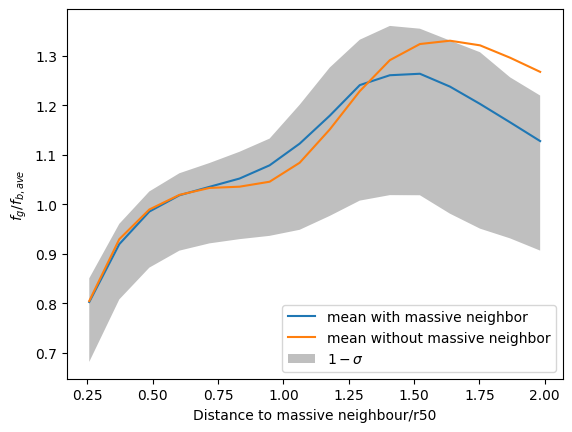

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111)
print(len(f_bar))
bins=np.linspace(0.2,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(bin)
per=np.percentile(f_bar[d>0], [16, 50, 64], axis=0)
per_nn=np.percentile(f_bar[d==0], [16, 50, 64], axis=0)
#ax.plot(bin,f_bar[1303])
print(d[1303])
ax.plot(bin, per[1], label='mean with massive neighbor')
ax.plot(bin, per_nn[1], label='mean without massive neighbor')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.set_xlabel('Distance to massive neighbour/r50')
ax.set_ylabel(r'$f_{g}$/$f_{b,ave}$')
ax.legend()

11965
[0.0625 0.1875 0.3125 0.4375 0.5625 0.6875 0.8125 0.9375 1.0625 1.1875
 1.3125 1.4375 1.5625 1.6875 1.8125 1.9375 2.0625 2.1875 2.3125 2.4375]


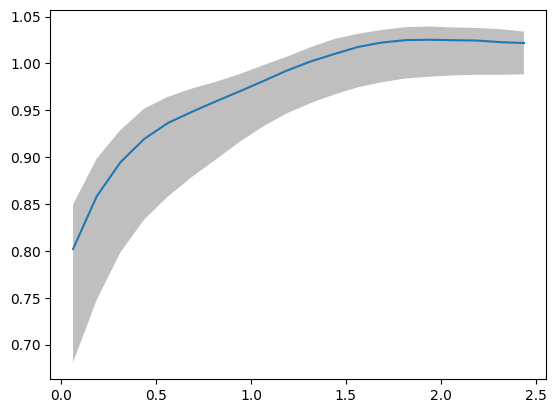

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
print(len(f_bar))
bins=np.linspace(0,2.5,21)
bin=(bins[1:]+bins[:-1])/2
print(bin)
per=np.percentile(f_bar_cu[peak==0], [16, 50, 64], axis=0)

ax.plot(bin, per[1], label='mean')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")

[0.71550906 1.01473553 1.01503257 0.99059559 0.9771731  0.96846324
 0.95963048 0.95574391 0.95142469 0.95547624 0.9878184  1.04906232
 1.11645687 1.17538526 1.21094167 1.22656801 1.22805593 1.21402388
 1.1945789  1.17522165 1.1535849  1.13607632 1.11917807 1.10515401
 1.09252785]


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1892/1960955188.py:17: RuntimeWarning: invalid value encountered in divide
  fbar_l=hgas_l*8.56/(hdm_l*45.2+hgas_l*8.56)/(0.0494/0.316)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1892/1960955188.py:27: RuntimeWarning: invalid value encountered in divide
  fbar_l=hgas_l*8.56/(hdm_l*45.2+hgas_l*8.56)/(0.0494/0.316)


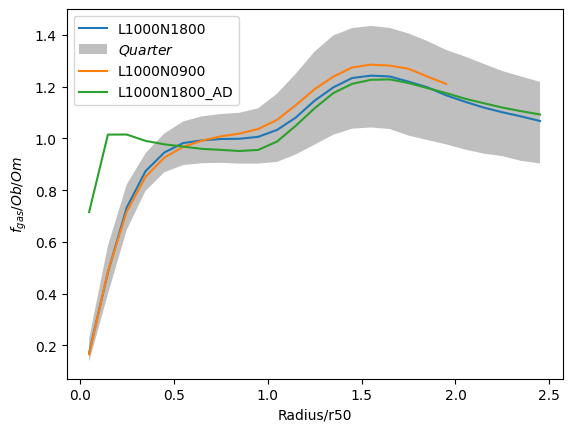

In [4]:
path="/Users/24756376/data/Flamingo/L1000N1800/"
f=h5py.File(path+"particle_counts.hdf5","r")

hgas=np.array(f["hgas"])
hdm=np.array(f["hdm"])
bin=np.array(f["bin"])

fbar=hgas*8.56/(hdm*45.2+hgas*8.56)/(0.0494/0.316)
f.close()
path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+"particle_counts.hdf5","r")

hgas_l=np.array(f["hgas"])
hdm_l=np.array(f["hdm"])
bin_l=np.array(f["bin"])

fbar_l=hgas_l*8.56/(hdm_l*45.2+hgas_l*8.56)/(0.0494/0.316)
f.close()

path="/Users/24756376/data/Flamingo/L1000N1800_NoCool/"
f=h5py.File(path+"particle_counts.hdf5","r")

hgas_ad=np.array(f["hgas"])
hdm_ad=np.array(f["hdm"])
bin_ad=np.array(f["bin"])

fbar_l=hgas_l*8.56/(hdm_l*45.2+hgas_l*8.56)/(0.0494/0.316)
fbar_ad=hgas_ad*8.56/(hdm_ad*45.2+hgas_ad*8.56)/(0.0494/0.316)
f.close()
fig=plt.figure()
ax=fig.add_subplot(111)
args=[12, 16,21,27, 40, 47,50,52,61,64,70,73,82, 93, 96, 101,107,112,121,139,141,146,153,160,167,173,187,191,192,196]
per=np.percentile(fbar, [25, 50, 75], axis=0)
ax.plot(bin, per[1], label='L1000N1800')
#ax.plot(bin,fbar_l[187],label='halo12')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$Quarter$")
per=np.percentile(fbar_l, [25, 50, 75], axis=0)
ax.plot(bin, per[1], label='L1000N0900')
per=np.percentile(fbar_ad, [25, 50, 75], axis=0)
ax.plot(bin, per[1], label='L1000N1800_AD')
print(per[1])
ax.set_xlabel('Radius/r50')
ax.set_ylabel(r'$f_{gas}$/$Ob/Om$')
ax.legend()

0


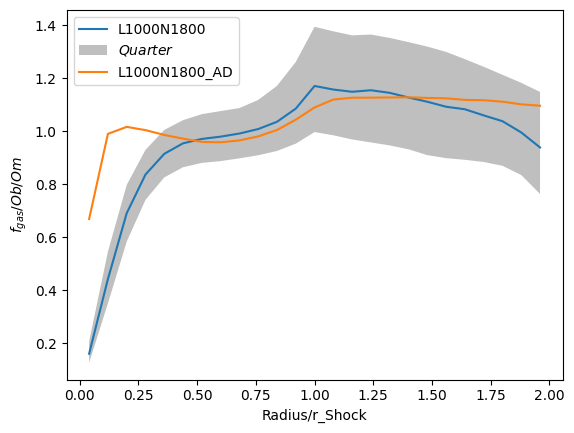

In [20]:
path="/Users/24756376/data/Flamingo/L1000N1800/"
f=h5py.File(path+"particle_counts.hdf5","r")
Rs=np.array(f["Shock_Radius"])
hgas_sr=np.array(f["hgas_sr"])
hdm_sr=np.array(f["hdm_sr"])
bin_sr=np.array(f["bin_sr"])


f.close()
path="/Users/24756376/data/Flamingo/L1000N1800_NoCool/"
f=h5py.File(path+"particle_counts.hdf5","r")
Rs_ad=np.array(f["Shock_Radius"])
hgas_ad_sr=np.array(f["hgas_sr"])
hdm_ad_sr=np.array(f["hdm_sr"])
bin_ad_sr=np.array(f["bin_sr"])

fbar_ad_sr=hgas_ad_sr*1.07/(hdm_ad_sr*5.65+hgas_ad_sr*1.07)/(0.0494/0.316)
f.close()

mask=(hgas_sr[:,19]>=0)
mask_ad=(hgas_ad_sr[:,19]>=0)
fbar_sr=hgas_sr[mask]*1.07/(hdm_sr[mask]*5.65+hgas_sr[mask]*1.07)/(0.0494/0.316)
fbar_ad_sr=hgas_ad_sr[mask_ad]*1.07/(hdm_ad_sr[mask_ad]*5.65+hgas_ad_sr[mask_ad]*1.07)/(0.0494/0.316)

fig=plt.figure()
ax=fig.add_subplot(111)
args=[12, 16,21,27, 40, 47,50,52,61,64,70,73,82, 93, 96, 101,107,112,121,139,141,146,153,160,167,173,187,191,192,196]
per=np.percentile(fbar_sr, [25, 50, 75], axis=0)
ax.plot(bin_sr, per[1], label='L1000N1800')
#ax.plot(bin,fbar_l[187],label='halo12')
ax.fill_between(bin_sr, per[0],per[2], facecolor='gray', alpha=.5, label=r"$Quarter$")
per=np.percentile(fbar_ad_sr, [25, 50, 75], axis=0)
ax.plot(bin_ad_sr, per[1], label='L1000N1800_AD')
#for i in range(1000,1002):
#   ax.plot(bin_sr, fbar_sr[i], color='gray', alpha=0.3)
ax.set_xlabel('Radius/r_Shock')
ax.set_ylabel(r'$f_{gas}$/$Ob/Om$')
ax.legend()
print(len(np.argwhere(hgas_ad_sr[:,19]==0)))

[1228 1535 1688 1782 2424 2596 2915 3403 3985 4148 4398 4449 4528 4701
 5143 6331 6389 6646 6811 7501 8559]
[1206 1468 1718 1830 2411 2077 2820 3780 4077 4339 4206 4510 4840 4918
 5678 6288 6389 7146 7013 7776 8697]


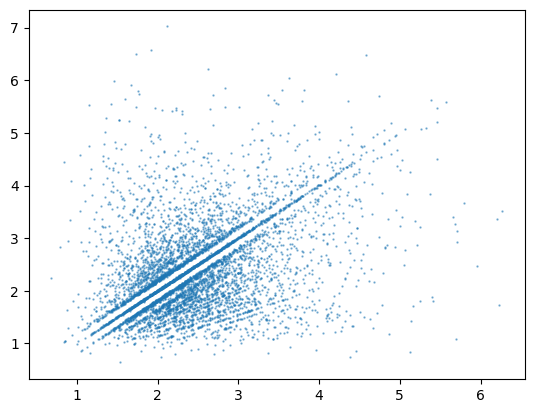

In [35]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800/same_halos.hdf5",'r')
same_id=np.array(f["ids"])
f.close()
f=h5py.File("/Users/24756376/data/Flamingo/L1000N1800_NoCool/same_halos.hdf5",'r')
same_id_ad=np.array(f["ids"])
f.close()
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter((Rs)[same_id],(Rs_ad)[same_id_ad],s=0.5,alpha=0.5
        )
#ax.hist(Rs_ad/r50_ad,bins=30,alpha=0.5,label='L1000N1800_AD'
#       )
print(same_id[(Rs)[same_id]-(Rs_ad)[same_id_ad]>3])
print(same_id_ad[(Rs)[same_id]-(Rs_ad)[same_id_ad]>3])
#ax.plot(np.linspace(1,6,10),np.linspace(1,6,10),linestyle='dashed',color='k')

[[ 1375]
 [ 1673]
 [ 1837]
 [ 1842]
 [ 1987]
 [ 2155]
 [ 2178]
 [ 2245]
 [ 2395]
 [ 2426]
 [ 2611]
 [ 2822]
 [ 2829]
 [ 2839]
 [ 2970]
 [ 3261]
 [ 3344]
 [ 3600]
 [ 3867]
 [ 3909]
 [ 3982]
 [ 4262]
 [ 4391]
 [ 4695]
 [ 4722]
 [ 5055]
 [ 5114]
 [ 5152]
 [ 5191]
 [ 5209]
 [ 5237]
 [ 5242]
 [ 5526]
 [ 5599]
 [ 5793]
 [ 5920]
 [ 5936]
 [ 6013]
 [ 6054]
 [ 6130]
 [ 6268]
 [ 6284]
 [ 6298]
 [ 6307]
 [ 6349]
 [ 6447]
 [ 6495]
 [ 6688]
 [ 6705]
 [ 6714]
 [ 6720]
 [ 6792]
 [ 6843]
 [ 6920]
 [ 6980]
 [ 7017]
 [ 7064]
 [ 7094]
 [ 7129]
 [ 7297]
 [ 7336]
 [ 7366]
 [ 7408]
 [ 7451]
 [ 7463]
 [ 7582]
 [ 7618]
 [ 7656]
 [ 7767]
 [ 7923]
 [ 8212]
 [ 8854]
 [ 8936]
 [ 9043]
 [ 9195]
 [ 9210]
 [ 9545]
 [ 9710]
 [ 9749]
 [ 9790]
 [ 9833]
 [ 9846]
 [ 9947]
 [10002]
 [10027]
 [10104]
 [10110]
 [10174]
 [10273]
 [10312]
 [10360]
 [10384]
 [10404]
 [10407]
 [10492]
 [10587]
 [10613]
 [10646]
 [10851]
 [10868]
 [11088]
 [11223]
 [11357]
 [11358]
 [11398]
 [11605]
 [11626]
 [11717]
 [11756]
 [11783]
 [11863]]


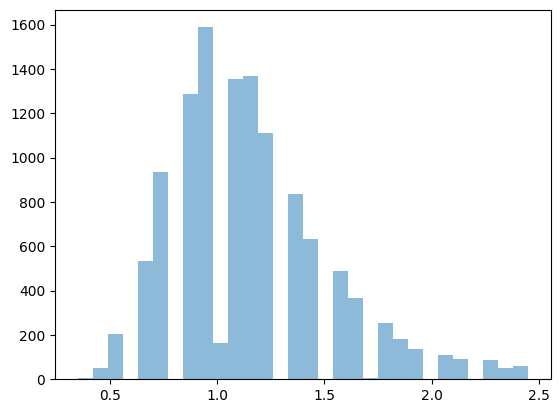

In [37]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(Rs_ad/r50_ad,bins=30,alpha=0.5,label='L1000N1800_AD')
print(np.argwhere(Rs_ad/r50_ad>2.3))

[[20116 59425 68168 ... 22883 20617 20167]
 [15652 43004 60066 ... 13404 14290 14980]
 [15825 56585 68133 ... 18269 18647 18400]
 ...
 [  281   921  1609 ...   614   731   682]
 [  170   651  1054 ...   505   511   493]
 [  146   605  1699 ...   402   482   461]]


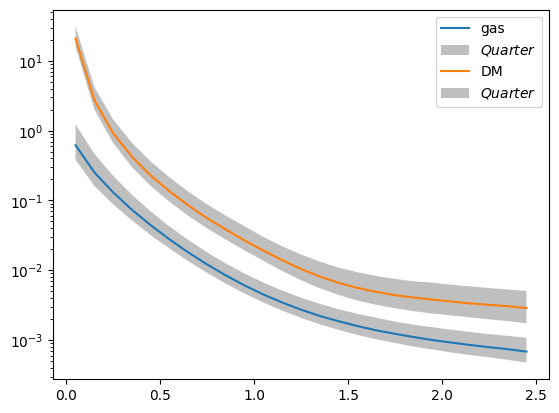

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
rhog=np.zeros((len(r50), len(bin)))
rhodm=np.zeros((len(r50), len(bin)))
for i in range(len(r50)):
  rhog[i]=hgas_l[i]/(bin[1]-bin[0])/(4*np.pi*bin**2)/50*1.07*r50[i]**3/np.sum(hgas_l[i])
  rhodm[i]=hdm_l[i]/(bin[1]-bin[0])/(4*np.pi*bin**2)/50*5.65*r50[i]**3/np.sum(hdm_l[i])
per=np.percentile(rhog, [25,50,75], axis=0)
print(hgas)
ax.plot(bin, per[1], label='gas')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$Quarter$")
per=np.percentile(rhodm, [25,50,75], axis=0)

ax.plot(bin, per[1], label='DM')
ax.fill_between(bin, per[0],per[2], facecolor='gray', alpha=.5, label=r"$Quarter$")
ax.legend()
#ax.plot(bin,hdm[196]/np.sum(hdm[187]))
ax.set_yscale('log')
#ax.set_xscale('log')